In [1]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('cleaned_dataset.csv')

### Impact of age

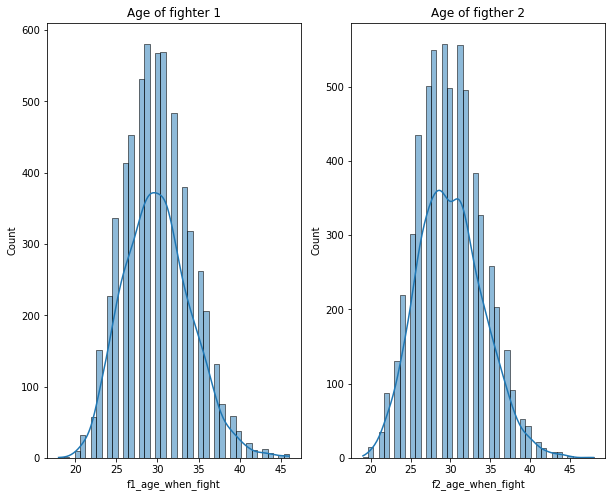

In [3]:
f, ax = plt.subplots(1, 2, figsize=(10,8))
sns.histplot(df['f1_age_when_fight'], ax=ax[0], kde=True)
ax[0].set_title('Age of fighter 1')
sns.histplot(df['f2_age_when_fight'], ax=ax[1], kde=True)
ax[1].set_title('Age of figther 2')
plt.show()

The majority of fighters are between the age of 25-35. This makes sense since for a sport such as MMA, the top athletes have a great combination of strength, speed and experience. A fighter would need to cumulate enough skill, while staying around the age where one reachs his/her top physical performance to compete. Not to mention that the "career life span" of an athlete in this sport is relatively short, since one cumulates a lot of damage of each fight

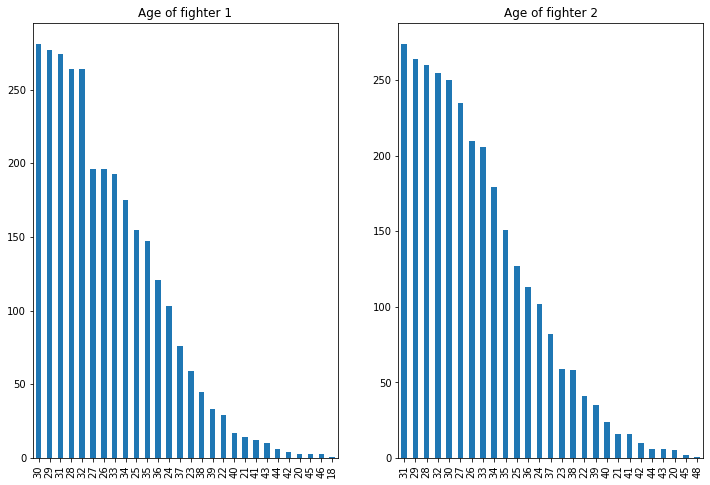

In [4]:
f, ax = plt.subplots(1, 2, figsize=(12,8))
df[df['winner'] == 0]['f1_age_when_fight'].value_counts().plot.bar(ax=ax[0])
ax[0].set_title('Age of fighter 1')

bar = df[df['winner'] ==1]['f2_age_when_fight'].value_counts().plot.bar(ax=ax[1])
ax[1].set_title('Age of fighter 2')

plt.show()

As we can see more clearly here, the fighters in the age-range 25-35 tend to win more as well

### importance of height
we focus more on the impact of height than reach here because a lot of reach data was missing and we had to fill those in

In [5]:
height_ref = df.groupby('weight_class')['height_f1'].apply(list)
height_ref

weight_class
Bantamweight             [172.72, 167.64, 167.64, 167.64, 180.34, 172.7...
Catch Weight             [175.26, 172.72, 167.64, 177.8, 185.42, 167.64...
Featherweight            [167.64, 185.42, 177.8, 170.18, 170.18, 180.34...
Flyweight                [167.64, 172.72, 170.18, 165.1, 165.1, 170.18,...
Heavyweight              [182.88, 200.66, 195.58, 193.04, 177.8, 190.5,...
Light Heavyweight        [190.5, 185.42, 193.04, 190.5, 187.96, 193.04,...
Lightweight              [180.34, 182.88, 177.8, 170.18, 175.26, 172.72...
Middleweight             [190.5, 172.72, 182.88, 180.34, 177.8, 185.42,...
Open Weight              [190.5, 185.42, 185.42, 185.42, 190.5, 185.42,...
Welterweight             [182.88, 185.42, 185.42, 182.88, 177.8, 190.5,...
Women's Bantamweight     [165.1, 172.72, 172.72, 167.64, 170.18, 167.64...
Women's Featherweight    [172.72, 172.72, 167.64, 172.72, 172.72, 182.8...
Women's Flyweight        [165.1, 170.18, 162.56, 167.64, 165.1, 162.56,...
Women's Stra

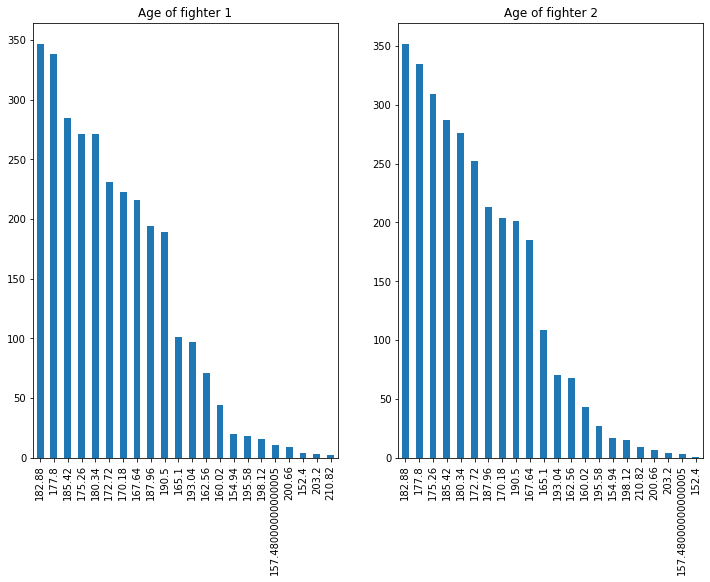

In [6]:
f, ax = plt.subplots(1, 2, figsize=(12,8))
df[df['winner'] == 0]['height_f1'].value_counts().plot.bar(ax=ax[0])
ax[0].set_title('Age of fighter 1')

bar = df[df['winner'] ==1]['height_f2'].value_counts().plot.bar(ax=ax[1])
ax[1].set_title('Age of fighter 2')

plt.show()

### Fight division

In [7]:
df.columns

Index(['card_name', 'f1', 'f1_sig_strike_per', 'f1_sig_strike_total',
       'f1_td_attempt', 'f1_td_succeed', 'f2', 'f2_sig_strike_per',
       'f2_sig_strike_total', 'f2_td_attempt', 'f2_td_succeed',
       'fights_location', 'round_format', 'round_fought', 'weight_class',
       'winner', 'winning_method', 'fight_year', 'SApM_f1', 'SLpM_f1',
       'height_f1', 'reach_f1', 'stance_f1', 'strAcc_f1', 'strDef_f1',
       'subAvg_f1', 'tdAcc_f1', 'tdAvg_f1', 'tdDef_f1', 'weight_f1',
       'born_year_f1', 'win_f1', 'lose_f1', 'draw_f1', 'nc_f1', 'SApM_f2',
       'SLpM_f2', 'height_f2', 'reach_f2', 'stance_f2', 'strAcc_f2',
       'strDef_f2', 'subAvg_f2', 'tdAcc_f2', 'tdAvg_f2', 'tdDef_f2',
       'weight_f2', 'born_year_f2', 'win_f2', 'lose_f2', 'draw_f2', 'nc_f2',
       'f1_age_when_fight', 'f2_age_when_fight'],
      dtype='object')

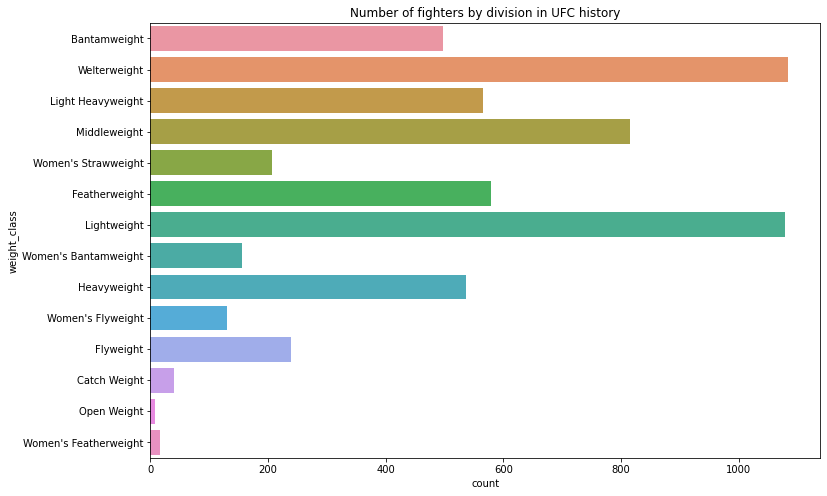

In [8]:
plt.figure(figsize=(12, 8))
sns.countplot(y=df['weight_class'])
plt.title('Number of fighters by division in UFC history')
sns.set()
sns.set(style='white')
plt.show()

### Most dominant winning method

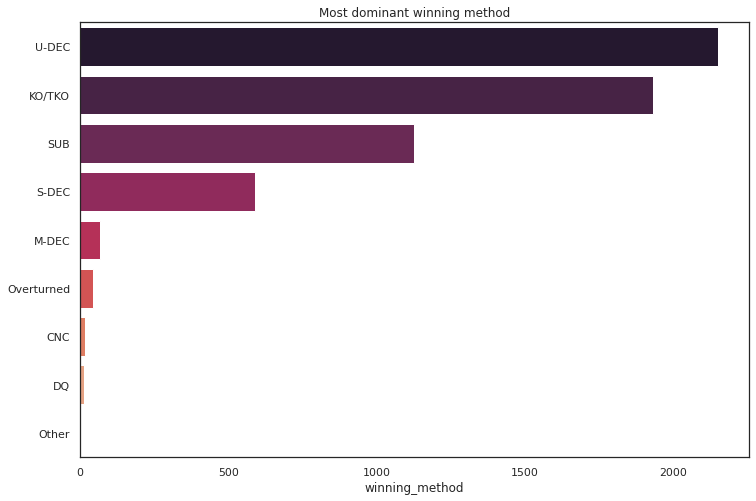

In [10]:
x = df['winning_method'].value_counts()
y = x.index


plt.figure(figsize=(12, 8))
sns.barplot(x=x, y=y, palette='rocket')
plt.title('Most dominant winning method')

plt.show()

This is somewhat unsurprising. Most of the fight ends with unanimous decision, following by TK/TKO.

It would be interesting to see whether it is the same case for every weight class

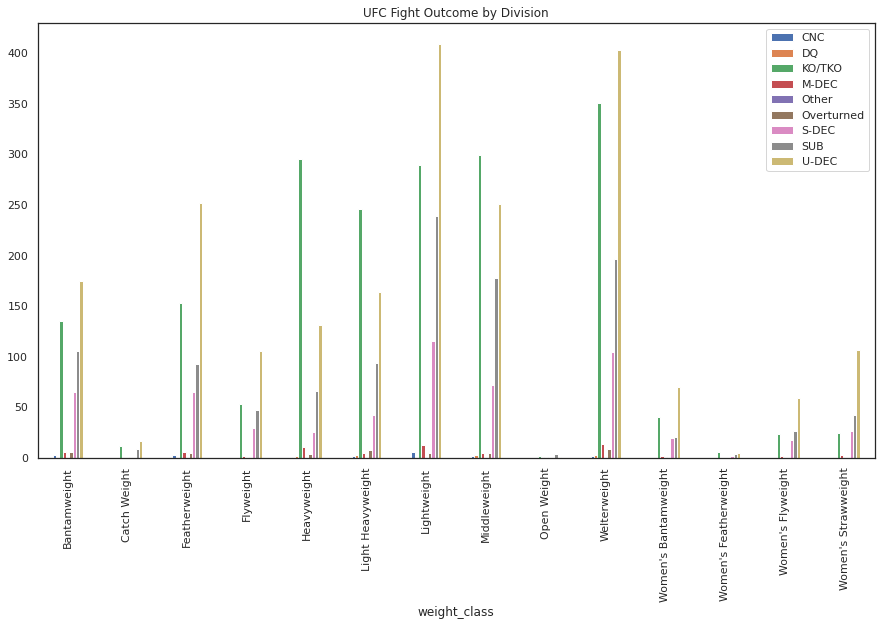

In [13]:
bar = df.groupby(['weight_class', 'winning_method']).size().reset_index().pivot(columns='winning_method', index='weight_class', values=0)
bar.plot(kind='bar',stacked=False, figsize=(15,8))
plt.legend()
plt.title('UFC Fight Outcome by Division')
plt.show()

It is interesting to see here that from Middleweight upward, fights end more with KO/TKO than unanimous decision. When I think about it, it makes sense. Due to their sheer power, any punch/kick landed could result in a knockout.

Another interesting thing is that in Women's Flyweight and Strawweight, although most fights still end with Unanimous decision, the 2nd winning method is actually through submission. This is not the case in any of the men division

Let now see whether the distribution of winning method changes over the years

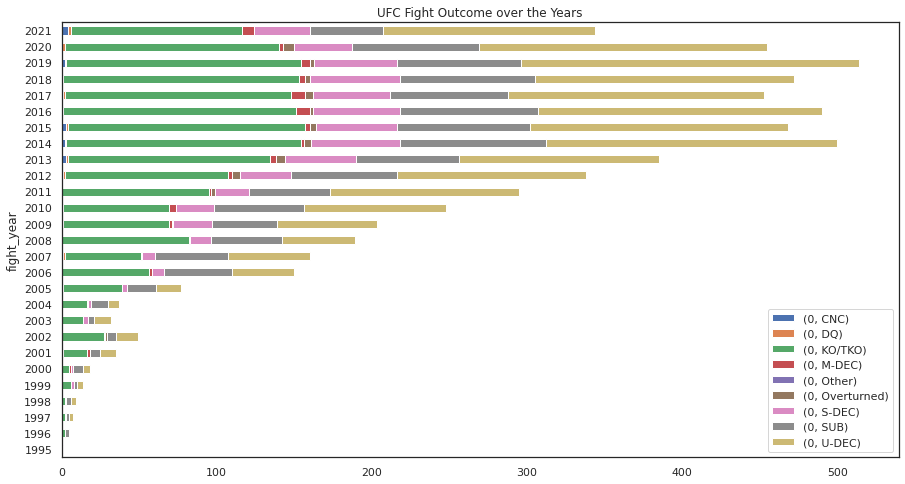

In [16]:
bar = df.groupby(['fight_year', 'winning_method']).size().reset_index().pivot(columns='winning_method', index='fight_year')
bar.plot(kind='barh', stacked=True, figsize=(15,8))
plt.legend()
plt.title('UFC Fight Outcome over the Years')

plt.show()